Q1) Choose your favourite classifier

Our group decided to choose the randomforest classifier! (see below for more information)

Q2) Prepare one slide to explain how your classifier works (e.g., syntax for scikit-learn, parameters).

**How does this classifier work**: A randomforest classifier uses a series of decision trees in order to classify a dataset. It makes predictions (classifies the data) based on the majority vote of all the decision trees. There are multiple advantages of using a randomforest classifier, such as its simplicity, ability to manage multiple classes and features, and high accuracy. Additionally, this classifier has the capability to reduce overfitting. It does this by distributing the training data randomly between the trees (thus using unique samples of the data) and by casting a majority vote, leading to a generalizable model.
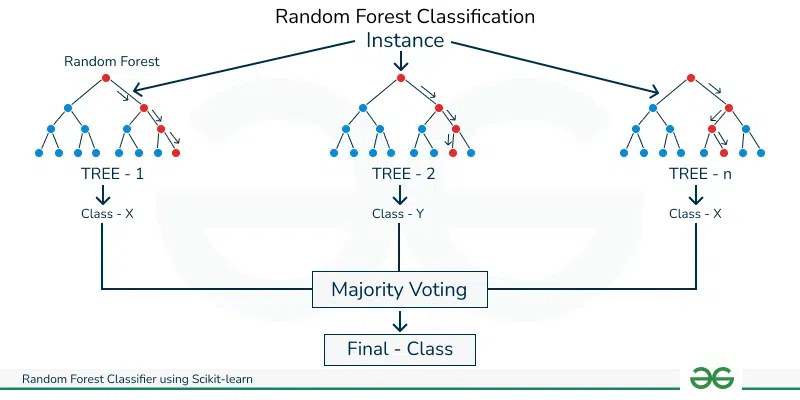

**Syntax**

*The syntax below shows the default values of the randomforest classifier parameters:*

rf_model = RandomForestClassifier(n_estimators = 100, criterion = 'gini',max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 'sqrt', max_leaf_nodes = None, min_impurity_decrease = 0.0, bootstrap = True, oob_score = False, n_jobs = None, random_state = None, verbose = 0, warm_start = False, class_weight = None, ccp_alpha = 0.0, max_samples = None, monotonic_cst = None)


*The syntax below shows the values of the randomforest classifier parameters used in our model:*

(random_state = 42) - the random_state (controls the randomness of the model) was changed to 42 because this is a standard value for this classifier ("the answer to life, the universe, and everything")

*The remainder of the parameters were default:*

(n_estimators = 100, criterion = 'gini',max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 'sqrt', max_leaf_nodes = None, min_impurity_decrease = 0.0, bootstrap = True, oob_score = False, n_jobs = None, verbose = 0, warm_start = False, class_weight = None, ccp_alpha = 0.0, max_samples = None, monotonic_cst = None)

*References:*
https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Q3) Load the breast_cancer dataset.

In [27]:
#import libraries
#data
import sklearn
from sklearn.datasets import load_breast_cancer

#dataframe/array
import numpy as np
import pandas as pd

#data split
from sklearn.model_selection import train_test_split

#modeling
from sklearn.ensemble import RandomForestClassifier

#evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

#plotting
import matplotlib.pyplot as plt

In [28]:
#load breast cancer dataset
bc_data = load_breast_cancer()

In [29]:
#Explanatory Data Analysis (EDA) - organize data
#list the keys of data
bc_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
#list target_names (meaning of the labels)
label_names = bc_data['target_names']
print(label_names)

['malignant' 'benign']


In [31]:
#list target (classification of labels)
labels = bc_data['target']
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [32]:
#list feature_names (attributes)
feature_names = bc_data['feature_names']
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [33]:
#list features (the working data)
features = bc_data['data']
print(features)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [34]:
#find the length of the data
print(f"There are {len(features)} records")

There are 569 records


In [35]:
#use describe to find out additional information about the data
print(bc_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [36]:
#assign X variable(features) 
X = pd.DataFrame(bc_data.data, columns = bc_data.feature_names)
print(X.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [37]:
#assign y variable (class - malignant = 0 or benign = 1)
y = bc_data.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Q4) Use your classifier to classify the breast cancer data into benign and malignant.

In [39]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10, shuffle = True, stratify = y)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (455, 30), X_test shape: (114, 30)
y_train shape: (455,), y_test shape: (114,)


In [40]:
#create the random forest classifier model, random_state = controls randomness, "the answer to life, the universe, and everything"
rf_model = RandomForestClassifier(random_state = 42)

#train the model
rf_model.fit(X_train, y_train)

#test the model
y_pred_rf = rf_model.predict(X_test)

#evaluate model by calculating accuracy 
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of classification on test set: {accuracy_rf:.2f}')

Accuracy of classification on test set: 0.95


In [41]:
#classification report for random forest classifier model
#y_test and y_pred are true and predicted labels
print(classification_report(y_test,y_pred_rf))
print('The classification report of the random forest model')

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

The classification report of the random forest model


#Q5) Use cross validation to evaluate the accuracy of your classifier. Report the ROC for one fold.

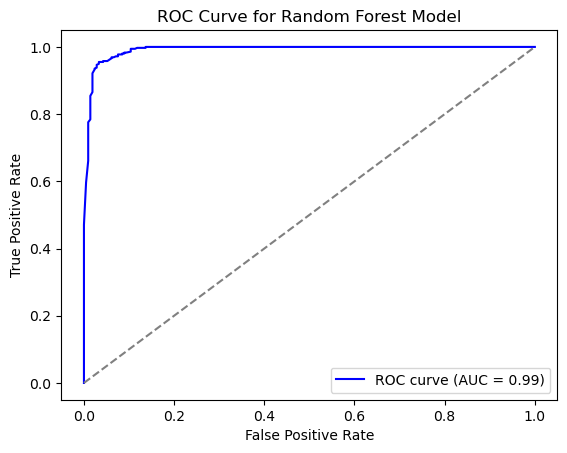

ROC AUC: 0.99


In [43]:
#perform cross validation and get predicted probailities 
y_pred_prob_rf = cross_val_predict(rf_model, X, y, cv=5, method='predict_proba')

# Compute ROC curve for the first fold
fpr, tpr, thresholds = roc_curve(y, y_pred_prob_rf[:, 1])

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print(f'ROC AUC: {roc_auc:.2f}')